# Programming Assignment 1
## Arnav Thaker


---

### Problem 1

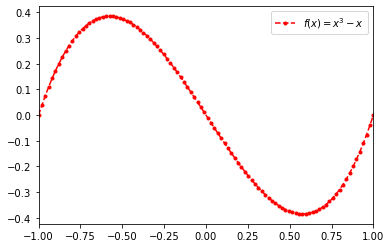

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x ** 3 - x
x = torch.linspace(-1, 1, 100)

plt.plot(x, f(x), '.--r', label = '$f(x) = x^3 -x$')
plt.xlim(-1, 1)
plt.legend()

---

### Problem 2

The roots are:  [-0.5]  and  [1.]


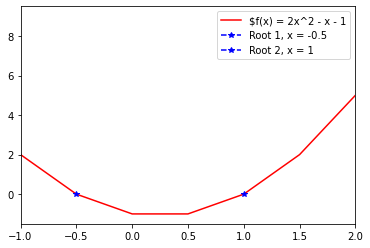

In [2]:
from scipy.optimize import fsolve
def f(x):
    return 2 * x ** 2 - x - 1

root1 = fsolve(f, -1)
root2 = fsolve(f, 1)
print("The roots are: ", root1, " and ", root2)

x = torch.linspace(-2, 2.5, 10)

plt.plot(x, f(x), '-r', label = '$f(x) = 2x^2 - x - 1')
plt.plot(root1, f(root1), '*--b', label = 'Root 1, x = -0.5')
plt.plot(root2, f(root2), '*--b', label = 'Root 2, x = 1')
plt.xlim(-1, 2)
plt.legend()

---

### Problem 4

In [4]:
A = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]], dtype = torch.float32)
b = torch.tensor([[1], [2], [3]], dtype = torch.float32)
x, LU = torch.solve(b, torch.mm(A, A))
print("A is ", A)
print("b is ", b)
print("Solving A^2 x = b, we get" )
print("x = ", x)

A is  tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])
b is  tensor([[1.],
        [2.],
        [3.]])
Solving A^2 x = b, we get
x =  tensor([[-0.0010],
        [ 0.2241],
        [-0.1676]])


---

### Problem 5

In [5]:
x = torch.tensor([1.0])
y = torch.tensor([2.0], requires_grad = True)
z = x ** 2 + y ** 2 + (x * y) ** 3
grad = torch.autograd.grad(outputs = z, inputs = y)
print("Derivative of x^2 + y^2 + (xy)^3 wrt y evaluated") 
print(" at x = 1, y = 2 is ")
print(grad)

Derivative of x^2 + y^2 + (xy)^3 wrt y evaluated
 at x = 1, y = 2 is 
(tensor([16.]),)


---

### Problem 7

In [6]:
def f_minMax(x):
    maxVal = x[0]
    minVal = x[0]
    for i in range(len(x)):
        if x[i] < minVal:
            minVal = x[i]
        if x[i] > maxVal:
            maxVal = x[i]
    print("Sequence is ", x)
    print("Max is ", maxVal)
    print("Min is ", minVal, "\n")
f_minMax(np.random.randint(0, 10, 5))
f_minMax(np.random.randint(-12, -3, 9))
f_minMax(np.random.randint(-32, 21, 19))
f_minMax(np.random.randint(0, 2, 3))


Sequence is  [2 2 0 2 6]
Max is  6
Min is  0 

Sequence is  [-12 -11 -11  -9 -10  -4  -4 -12 -10]
Max is  -4
Min is  -12 

Sequence is  [ 17   0  -5 -11 -20  -8 -14  -1 -30 -28   5  20  14 -11  -3   6 -24  10
  12]
Max is  20
Min is  -30 

Sequence is  [1 0 1]
Max is  1
Min is  0 



--- 

### Problem 8

In [7]:
def f_sort(x):
    print("Sequence is ", x)
    for i in range(len(x)):
        current = i
        for j in range(i+1, len(x)):
            if x[j] < x[current]:
                current = j
        temp = x[i]
        x[i] = x[current]
        x[current] = temp
        
    x = sorted(x)
    
    print("Sorted sequence is ", x, "\n")
    
f_sort(np.random.randint(0, 10, 5))
f_sort(np.random.randint(-12, -3, 9))
f_sort(np.random.randint(-32, 21, 19))
f_sort(np.random.randint(0, 2, 3))

Sequence is  [4 1 1 9 6]
Sorted sequence is  [1, 1, 4, 6, 9] 

Sequence is  [ -8  -7  -9  -7  -7  -4  -7  -4 -12]
Sorted sequence is  [-12, -9, -8, -7, -7, -7, -7, -4, -4] 

Sequence is  [ 14   3 -25  16 -13 -29  14   3 -30   4 -17 -31 -13   9   0  19  -8 -17
   9]
Sorted sequence is  [-31, -30, -29, -25, -17, -17, -13, -13, -8, 0, 3, 3, 4, 9, 9, 14, 14, 16, 19] 

Sequence is  [1 1 1]
Sorted sequence is  [1, 1, 1] 



---

### Problem 9

In [7]:
x = torch.tensor([0.0], requires_grad = True)
y = torch.tensor([0.0], requires_grad = True)
eta = 0.1


# simple gradient descent with 10 iterations
for i in range(10):
    # set differentiable function and compute partials
    z = (x-2)**2 + y**2 + 2*(y-4)**2 + 2*x**2 + 2*x*y + 4*y - 1
    x_partial = torch.autograd.grad(outputs = z, inputs = x, retain_graph = True, allow_unused = True)
    y_partial = torch.autograd.grad(outputs = z, inputs = y, retain_graph = True, allow_unused = True)
    
    # compute gradient descent
    x = x - eta * x_partial[0]
    y = y - eta * y_partial[0]
    
    print("x_t is now", x)
    print("y_t is now", y)
    print()
print("It's clear to see from the above approximation \n" 
      "that after running 10 iterations of gradient \n"
      "descent with initialization (0, 0) and eta = 0.1, \n"
      "x approaches 0 and y approaches 2. Thus, we conclude \n"
      "and say that the global minimum of this function is \n"
      "(0, 2)")    

x_t is now tensor([0.4000], grad_fn=<SubBackward0>)
y_t is now tensor([1.2000], grad_fn=<SubBackward0>)

x_t is now tensor([0.3200], grad_fn=<SubBackward0>)
y_t is now tensor([1.6000], grad_fn=<SubBackward0>)

x_t is now tensor([0.2080], grad_fn=<SubBackward0>)
y_t is now tensor([1.7760], grad_fn=<SubBackward0>)

x_t is now tensor([0.1280], grad_fn=<SubBackward0>)
y_t is now tensor([1.8688], grad_fn=<SubBackward0>)

x_t is now tensor([0.0774], grad_fn=<SubBackward0>)
y_t is now tensor([1.9219], grad_fn=<SubBackward0>)

x_t is now tensor([0.0466], grad_fn=<SubBackward0>)
y_t is now tensor([1.9533], grad_fn=<SubBackward0>)

x_t is now tensor([0.0280], grad_fn=<SubBackward0>)
y_t is now tensor([1.9720], grad_fn=<SubBackward0>)

x_t is now tensor([0.0168], grad_fn=<SubBackward0>)
y_t is now tensor([1.9832], grad_fn=<SubBackward0>)

x_t is now tensor([0.0101], grad_fn=<SubBackward0>)
y_t is now tensor([1.9899], grad_fn=<SubBackward0>)

x_t is now tensor([0.0060], grad_fn=<SubBackward0>)
y_t

---